<a href="https://colab.research.google.com/github/YUGESH-R/Deep_learning_lab_AU/blob/main/Deep_learning_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# XOR using DNN
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# XOR data
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0,1,1,0])

# Build DNN model
model = Sequential([
    Dense(4, input_dim=2, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(X, y, epochs=500, verbose=0)

# Test
print(model.predict(X))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
[[0.33205366]
 [0.43096066]
 [0.71795636]
 [0.5139677 ]]


In [ ]:
# Character regonization using cnn
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load MNIST for digit recognition (0-9)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# Build CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')   # 10 classes (0–9)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Evaluate
test_loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9119 - loss: 0.2903
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9861 - loss: 0.0452
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9913 - loss: 0.0267
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9938 - loss: 0.0182
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9950 - loss: 0.0146
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9862 - loss: 0.0448
Test Accuracy: 0.9898999929428101


In [16]:
#language modeling using rnn
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Sample text
text = "I love deep learning and I love neural networks"

# Tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
word_index = tokenizer.word_index

# Convert text to sequence of numbers
seq = tokenizer.texts_to_sequences([text])[0]

# Create input-output pairs
X = []
y = []
for i in range(1, len(seq)):
    X.append(seq[:i])
    y.append(seq[i])

X = pad_sequences(X)
y = np.array(y)

vocab_size = len(word_index) + 1

# Build RNN model
model = Sequential([
    Embedding(vocab_size, 10, input_length=X.shape[1]),
    SimpleRNN(50),
    Dense(vocab_size, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=200, verbose=0)

# Predict next word
seed = "I love"
seq = tokenizer.texts_to_sequences([seed])[0]
padded = pad_sequences([seq], maxlen=X.shape[1])
pred = model.predict(padded, verbose=0)
next_word = tokenizer.index_word[np.argmax(pred)]

print("Next word prediction:", next_word)


Next word prediction: deep


In [17]:
# -------------------------------------------------------------
# SENTIMENT ANALYSIS USING LSTM  (Google Colab Ready)
# -------------------------------------------------------------

# 1. Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

# 2. Sample Training Data
sentences = [
    "I love this movie",
    "This film was great",
    "I enjoyed the acting",
    "The movie was terrible",
    "I hated this film",
    "It was a bad movie"
]

labels = [1, 1, 1, 0, 0, 0]   # 1 = Positive, 0 = Negative

# 3. Tokenization
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')

# 4. Create LSTM Model
model = Sequential([
    Embedding(input_dim=1000, output_dim=16, input_length=padded.shape[1]),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. Train Model
model.fit(padded, np.array(labels), epochs=20, verbose=1)

# 6. Test the Model
test_sentences = [
    "I really loved the film",
    "The movie was horrible",
    "It was amazing",
    "I dislike this movie"
]

test_seq = tokenizer.texts_to_sequences(test_sentences)
test_pad = pad_sequences(test_seq, maxlen=padded.shape[1], padding='post')

predictions = model.predict(test_pad)

# 7. Print Results
for i, sentence in enumerate(test_sentences):
    sentiment = "Positive 😀" if predictions[i] > 0.5 else "Negative 😡"
    print(f"{sentence} -> {sentiment}")


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3333 - loss: 0.6936
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6667 - loss: 0.6931
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5000 - loss: 0.6926
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6667 - loss: 0.6921
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6667 - loss: 0.6915
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8333 - loss: 0.6910
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8333 - loss: 0.6904
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8333 - loss: 0.6898
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.6891
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.6884
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 0.6876
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.6868
Epo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
I really loved the film -> Positive 😀
The movie was horrible -> Negative 😡
It was amazing -> Positive 😀
I dislike this movie -> Positive 😀


In [20]:
# ------------------------------------------------------------
# PARTS OF SPEECH TAGGING USING SEQUENCE-TO-SEQUENCE (Seq2Seq)
# Encoder-Decoder LSTM Architecture (Simple Example)
# ------------------------------------------------------------

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense

# ------------------------------------------------------------
# 1. Toy Dataset (Simple for demonstration)
# ------------------------------------------------------------

sentences = [
    ["I", "love", "dogs"],
    ["You", "eat", "rice"],
    ["They", "play", "cricket"]
]

tags = [
    ["PRON", "VERB", "NOUN"],
    ["PRON", "VERB", "NOUN"],
    ["PRON", "VERB", "NOUN"]
]

# ------------------------------------------------------------
# 2. Create Word and Tag vocab
# ------------------------------------------------------------

word_vocab = {"PAD": 0}
tag_vocab = {"PAD": 0, "START": 1, "END": 2}

# Build vocabulary
for s in sentences:
    for w in s:
        if w not in word_vocab:
            word_vocab[w] = len(word_vocab)

for t in tags:
    for tg in t:
        if tg not in tag_vocab:
            tag_vocab[tg] = len(tag_vocab)

inv_tag = {v: k for k, v in tag_vocab.items()}

# ------------------------------------------------------------
# 3. Convert sentences and tags to integer sequences
# ------------------------------------------------------------

X = [[word_vocab[w] for w in s] for s in sentences]          # Input words
y = [[tag_vocab[t] for t in s] for s in tags]                # Output tags

max_len = max(len(x) for x in X)

# Padding
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=max_len, padding="post")

# Decoder input starts with START token
decoder_input = [[tag_vocab["START"]] + seq for seq in y]
decoder_input = tf.keras.preprocessing.sequence.pad_sequences(decoder_input, maxlen=max_len+1, padding="post")

# Decoder target ends with END token
decoder_target = [seq + [tag_vocab["END"]] for seq in y]
decoder_target = tf.keras.preprocessing.sequence.pad_sequences(decoder_target, maxlen=max_len+1, padding="post")
decoder_target = tf.keras.utils.to_categorical(decoder_target, num_classes=len(tag_vocab))

# ------------------------------------------------------------
# 4. BUILD SEQ2SEQ MODEL
# ------------------------------------------------------------

# Embedding layers - defined separately to be reused for inference models
encoder_embedding_layer = Embedding(len(word_vocab), 32, name='encoder_embedding')
decoder_embedding_layer = Embedding(len(tag_vocab), 32, name='decoder_embedding')

# Encoder
encoder_inputs = Input(shape=(max_len,))
enc_emb_output = encoder_embedding_layer(encoder_inputs)
encoder_lstm = LSTM(64, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb_output)

# Decoder
decoder_inputs = Input(shape=(max_len+1,))
dec_emb_output = decoder_embedding_layer(decoder_inputs)
decoder_lstm = LSTM(64, return_sequences=True, return_state=True) # Modified: Added return_state=True
decoder_outputs, _, _ = decoder_lstm(dec_emb_output, initial_state=[state_h, state_c]) # Modified: Unpacked and discarded states
decoder_dense = Dense(len(tag_vocab), activation="softmax")
decoder_outputs = decoder_dense(decoder_outputs)

# Full training model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

# ------------------------------------------------------------
# 5. TRAIN MODEL
# ------------------------------------------------------------

model.fit([X, decoder_input], decoder_target, epochs=100, verbose=1)

# ------------------------------------------------------------
# INFERENCE MODELS SETUP
# ------------------------------------------------------------

# 1. Encoder (Inference) Model
encoder_model = Model(encoder_inputs, [state_h, state_c])

# 2. Decoder (Inference) Model
# Input for decoder states
decoder_state_input_h = Input(shape=(64,), name='decoder_h_input')
decoder_state_input_c = Input(shape=(64,), name='decoder_c_input')
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# Input for the current predicted token (single timestep)
decoder_single_input = Input(shape=(1,), name='decoder_single_input')
dec_emb_inference_output = decoder_embedding_layer(decoder_single_input)

decoder_outputs_inference, state_h_output, state_c_output = decoder_lstm(
    dec_emb_inference_output, initial_state=decoder_states_inputs
)
decoder_states_output = [state_h_output, state_c_output]
decoder_outputs_inference = decoder_dense(decoder_outputs_inference)

decoder_model = Model(
    [decoder_single_input] + decoder_states_inputs,
    [decoder_outputs_inference] + decoder_states_output
)

# ------------------------------------------------------------
# 6. INFERENCE (Prediction)
# ------------------------------------------------------------

def predict_pos(sentence_words):
    # Convert input to sequence of word indices, pad it
    seq_input = [word_vocab.get(w, 0) for w in sentence_words]
    seq_input = tf.keras.preprocessing.sequence.pad_sequences([seq_input], maxlen=max_len, padding="post")

    # Get the initial states for the decoder from the encoder
    states_value = encoder_model.predict(seq_input, verbose=0)

    # Start with a sequence containing only the START token
    target_seq = np.array([[tag_vocab["START"]]])

    decoded_tags = []
    current_states = states_value

    # Predict up to max_len + 1 tokens (including 'END' or padded tokens)
    for _ in range(max_len + 1):
        # Predict next token and get new states
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + current_states, verbose=0
        )

        # Sample a token (greedy search)
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_tag = inv_tag[sampled_token_index]

        # Exit condition: EOS token or maximum length reached
        if sampled_tag == "END":
            break

        decoded_tags.append(sampled_tag)

        # Update target sequence for the next timestep (input is just the sampled token)
        target_seq = np.array([[sampled_token_index]])
        # Update states for the next timestep
        current_states = [h, c]

    return decoded_tags

# ------------------------------------------------------------
# TEST PREDICTION
# ------------------------------------------------------------

test_sentence = ["They", "eat", "dogs"]
print("Input Sentence:", test_sentence)
print("Predicted POS:", predict_pos(test_sentence))


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16      │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_17      │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_embedding   │ (None, 3, 32)     │        320 │ input_layer_16[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_embedding   │ (None, 4, 32)     │        192 │ input_layer_17[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ [(None, 64),      │     24,832 │ encoder_embeddin… │
│                     │ (None, 64),       │            │                   │
│                     │ (None, 64)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_6 (LSTM)       │ [(None, 4, 64),   │     24,832 │ decoder_embeddin… │
│                     │ (None, 64),       │            │ lstm_5[0][1],     │
│                     │ (None, 64)]       │            │ lstm_5[0][2]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 4, 6)      │        390 │ lstm_6[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 50,566 (197.52 KB)

 Trainable params: 50,566 (197.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2500 - loss: 1.7869
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3333 - loss: 1.7802
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4167 - loss: 1.7734
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6667 - loss: 1.7663
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6667 - loss: 1.7589
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6667 - loss: 1.7511
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6667 - loss: 1.7430
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6667 - loss: 1.7343
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6667 - loss: 1.7250
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6667 - loss: 1.7152
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6667 - loss: 1.7046
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6667 - loss

Predicted POS: ['PRON', 'VERB', 'NOUN']


In [21]:
# ------------------------------------------------------------
# MACHINE TRANSLATION USING ENCODER–DECODER (Seq2Seq LSTM)
# Simple English → French Translator (Google Colab Ready)
# ------------------------------------------------------------

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense

# ------------------------------------------------------------
# 1. Tiny English → French dataset
# ------------------------------------------------------------
english_sentences = [
    "i love dogs",
    "you eat rice",
    "she likes apples",
    "they play cricket",
]

french_sentences = [
    "j aime les chiens",
    "tu manges du riz",
    "elle aime les pommes",
    "ils jouent au cricket",
]

# Add START and END tokens for decoder
french_sentences_inputs = ["<start> " + s for s in french_sentences]
french_sentences_outputs = [s + " <end>" for s in french_sentences]

# ------------------------------------------------------------
# 2. Tokenization
# ------------------------------------------------------------
tokenizer_eng = tf.keras.preprocessing.text.Tokenizer(filters='')
tokenizer_fr = tf.keras.preprocessing.text.Tokenizer(filters='')

tokenizer_eng.fit_on_texts(english_sentences)
tokenizer_fr.fit_on_texts(french_sentences_inputs + french_sentences_outputs)

eng_sequences = tokenizer_eng.texts_to_sequences(english_sentences)
fr_sequences_input = tokenizer_fr.texts_to_sequences(french_sentences_inputs)
fr_sequences_output = tokenizer_fr.texts_to_sequences(french_sentences_outputs)

eng_vocab_size = len(tokenizer_eng.word_index) + 1
fr_vocab_size  = len(tokenizer_fr.word_index) + 1

max_eng_len = max(len(seq) for seq in eng_sequences)
max_fr_len  = max(len(seq) for seq in fr_sequences_input)

# Pad sequences
encoder_input = tf.keras.preprocessing.sequence.pad_sequences(eng_sequences, maxlen=max_eng_len, padding='post')
decoder_input = tf.keras.preprocessing.sequence.pad_sequences(fr_sequences_input, maxlen=max_fr_len, padding='post')
decoder_output = tf.keras.preprocessing.sequence.pad_sequences(fr_sequences_output, maxlen=max_fr_len, padding='post')

# One-hot encode decoder output
decoder_output = tf.keras.utils.to_categorical(decoder_output, num_classes=fr_vocab_size)

# ------------------------------------------------------------
# 3. Build Encoder–Decoder Model
# ------------------------------------------------------------
latent_dim = 128

# Encoder
encoder_inputs = Input(shape=(max_eng_len,))
enc_emb = Embedding(eng_vocab_size, 64)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
_, state_h, state_c = encoder_lstm(enc_emb)

# Decoder
decoder_inputs = Input(shape=(max_fr_len,))
dec_emb = Embedding(fr_vocab_size, 64)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

decoder_dense = Dense(fr_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Full training model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ------------------------------------------------------------
# 4. Train model
# ------------------------------------------------------------
model.fit([encoder_input, decoder_input], decoder_output, epochs=200, verbose=1)

# ------------------------------------------------------------
# 5. Inference (translation)
# ------------------------------------------------------------

# Build encoder model for inference
encoder_model = Model(encoder_inputs, [state_h, state_c])

# Build decoder model for inference
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2 = dec_emb
decoder_outputs2, h2, c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_outputs2 = decoder_dense(decoder_outputs2)
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs2, h2, c2])

# Reverse French word index for decoding
reverse_fr_index = {i: w for w, i in tokenizer_fr.word_index.items()}

def translate(sentence):
    # Convert English input sentence
    seq = tokenizer_eng.texts_to_sequences([sentence])
    seq = tf.keras.preprocessing.sequence.pad_sequences(seq, maxlen=max_eng_len, padding='post')

    # Encode input
    h, c = encoder_model.predict(seq)

    # Start with <start> token
    start_token = tokenizer_fr.word_index["<start>"]
    target_seq = np.array([[start_token]])

    translation = ""

    for _ in range(max_fr_len):
        output, h, c = decoder_model.predict([target_seq, h, c])
        sample_index = np.argmax(output[0, -1, :])
        sampled_word = reverse_fr_index.get(sample_index, '')

        if sampled_word == "<end>":
            break

        translation += sampled_word + " "

        target_seq = np.array([[sample_index]])

    return translation.strip()

# ------------------------------------------------------------
# 6. Test translation
# ------------------------------------------------------------
print("\nTRANSLATION TESTS:\n")
print("English: i love dogs")
print("French :", translate("i love dogs"))

print("\nEnglish: they play cricket")
print("French :", translate("they play cricket"))


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18      │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_19      │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_5         │ (None, 3, 64)     │        832 │ input_layer_18[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_6         │ (None, 5, 64)     │      1,088 │ input_layer_19[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ [(None, 128),     │     98,816 │ embedding_5[0][0] │
│                     │ (None, 128),      │            │                   │
│                     │ (None, 128)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_8 (LSTM)       │ [(None, 5, 128),  │     98,816 │ embedding_6[0][0… │
│                     │ (None, 128),      │            │ lstm_7[0][1],     │
│                     │ (None, 128)]      │            │ lstm_7[0][2]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 5, 17)     │      2,193 │ lstm_8[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 201,745 (788.07 KB)

 Trainable params: 201,745 (788.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.1000 - loss: 2.8351
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2000 - loss: 2.8277
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2000 - loss: 2.8201
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2000 - loss: 2.8123
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2500 - loss: 2.8041
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.2500 - loss: 2.7953
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2500 - loss: 2.7858
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2500 - loss: 2.7753
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2000 - loss: 2.7638
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2000 - loss: 2.7508
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2000 - loss: 2.7362
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.2000 - loss

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0, D Loss: 0.6777981519699097, G Loss: 0.6364008188247681
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


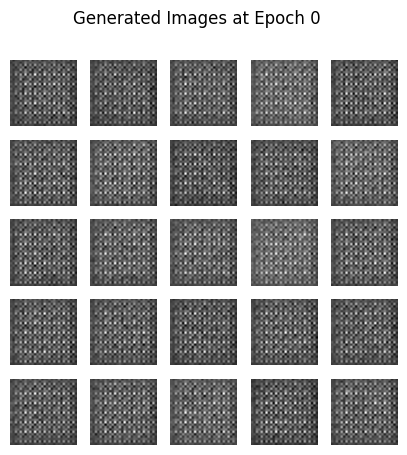

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 

KeyboardInterrupt: 

In [22]:
# ------------------------------------------------------------
# IMAGE AUGMENTATION USING DCGAN
# Simple GAN that generates new images (Google Colab Ready)
# ------------------------------------------------------------

import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------------------------
# 1. Load dataset (MNIST Example)
# ------------------------------------------------------------
(X_train, _), (_, _) = tf.keras.datasets.mnist.load_data()

# Normalize images
X_train = X_train.astype("float32") / 255.0
X_train = np.expand_dims(X_train, axis=-1)  # shape: (60000, 28, 28, 1)

# ------------------------------------------------------------
# 2. Create the Generator
# ------------------------------------------------------------
def build_generator():
    model = Sequential()
    model.add(Dense(7 * 7 * 256, input_dim=100))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7, 7, 256)))

    model.add(Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"))
    model.add(LeakyReLU(0.2))

    model.add(Conv2DTranspose(64, kernel_size=4, strides=2, padding="same"))
    model.add(LeakyReLU(0.2))

    model.add(Conv2DTranspose(1, kernel_size=7, activation="sigmoid", padding="same"))

    return model

# ------------------------------------------------------------
# 3. Create the Discriminator
# ------------------------------------------------------------
def build_discriminator():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=3, strides=2, padding="same", input_shape=(28, 28, 1)))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
    model.add(LeakyReLU(0.2))

    model.add(Flatten())
    model.add(Dense(1, activation="sigmoid"))
    return model

# ------------------------------------------------------------
# 4. Build and compile the GAN
# ------------------------------------------------------------
generator = build_generator()
discriminator = build_discriminator()

discriminator.compile(optimizer="adam", loss="binary_crossentropy")

# GAN = Generator + Discriminator (discriminator frozen)
discriminator.trainable = False

gan = Sequential([generator, discriminator])
gan.compile(optimizer="adam", loss="binary_crossentropy")

# ------------------------------------------------------------
# 5. Training the GAN
# ------------------------------------------------------------
def train(epochs=3000, batch_size=64, sample_interval=500):
    for epoch in range(epochs):

        # TRAIN DISCRIMINATOR
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_imgs = X_train[idx]

        noise = np.random.normal(0, 1, (batch_size, 100))
        fake_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_imgs, np.zeros((batch_size, 1)))
        d_loss = 0.5 * (d_loss_real + d_loss_fake)

        # TRAIN GENERATOR
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        # Display progress
        if epoch % 200 == 0:
            print(f"Epoch {epoch}, D Loss: {d_loss}, G Loss: {g_loss}")

        if epoch % sample_interval == 0:
            sample_images(epoch)

# ------------------------------------------------------------
# 6. Save Sample Generated Images
# ------------------------------------------------------------
def sample_images(epoch):
    noise = np.random.normal(0, 1, (25, 100))
    gen_imgs = generator.predict(noise)

    gen_imgs = gen_imgs.reshape(25, 28, 28)

    plt.figure(figsize=(5,5))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(gen_imgs[i], cmap='gray')
        plt.axis('off')

    plt.suptitle(f"Generated Images at Epoch {epoch}")
    plt.show()

# ------------------------------------------------------------
# 7. Start Training
# ------------------------------------------------------------
train(epochs=3000)
datagen = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/my_images",
    image_size=(28, 28),
    color_mode="grayscale"  # or "rgb"
)

images = []
for batch, _ in datagen:
    images.append(batch.numpy())

X_train = np.vstack(images) / 255.0
